<a href="https://colab.research.google.com/github/ctarrington/try-python/blob/master/language-scraps/tuples.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from collections import namedtuple

from matplotlib.pyplot import plot
from matplotlib import pyplot as plt

In [2]:
pairs = (tuple((x,y)) for x in range(5) for y in range(5))
print(pairs)

<generator object <genexpr> at 0x7fc258127a98>


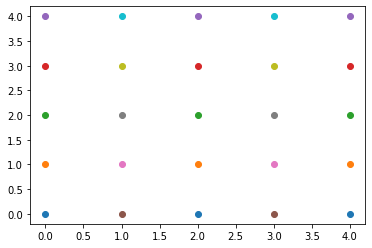

In [3]:
for pair in pairs:
  plot(*pair, 'o')
plt.show()

In [4]:
Pair = namedtuple('Pair', 'x y')
p = Pair(1,4)

pairs = (Pair(x=j,y=k) for j in range(4) for k in range(6) )
print(pairs)

<generator object <genexpr> at 0x7fc258127830>


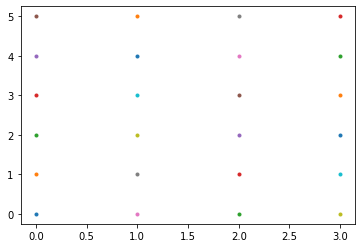

In [5]:
for pair in pairs:
  plot(pair.x, pair.y, '.')
plt.show()